In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
# ----------------------------
# Utility Functions
# ----------------------------

def train_set_split(x, y, test_size = 0.2, random_state = 42):
    np.random.seed(random_state)
    indices = np.random.permutation(len(x))
    test_count = int(len(x) * test_size)
    test_idx = indices[:test_count]
    train_idx = indices[test_count:]
    return x[train_idx], x[test_idx], y[train_idx], y[test_idx]

def add_bias(x):
    return np.c_[np.ones((x.shape[0], 1)), x]

def normal_equation(X, Y):
    return np.linalg.inv(X.T @ X) @ X.T @ Y


def calc_rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))


In [47]:
# ----------------------------
# Main Pipeline
# ----------------------------

df = pd.read_csv("../data/advertising.csv")

# Feature and target variables
x = df['TV'].values
y = df['Sales'].values

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_set_split(x, y)

# Add bias term to the features
x_train_design = add_bias(x_train)
x_test_design = add_bias(x_test)

# Train the model
weights = normal_equation(x_train_design, y_train)

# Predictions
y_train_pred = x_train_design @ weights
y_test_pred = x_test_design @ weights

# RMSE Calculation
rmse_train = calc_rmse(y_train, y_train_pred)
rmse_test = calc_rmse(y_test, y_test_pred)

residuals = y_test - y_test_pred

# Evaluate the model
print(f"RMSE (Train): {rmse_train:.4f}")
print(f"RMSE (Test): {rmse_test:.4f}")


RMSE (Train): 2.2357
RMSE (Test): 2.4700


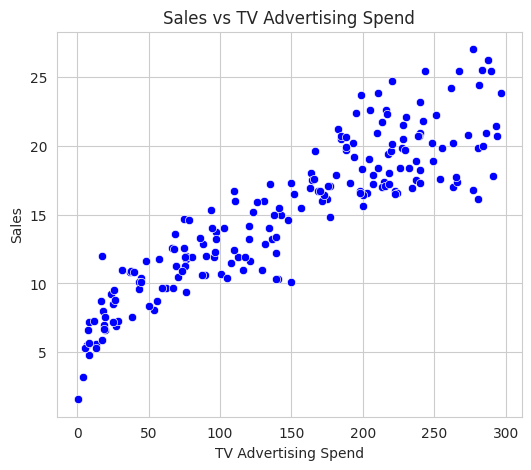

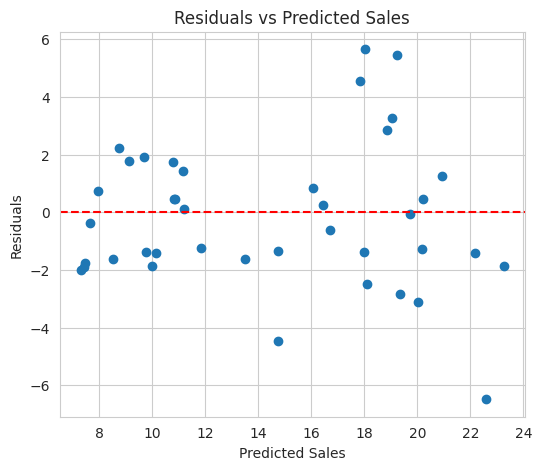

In [48]:
# ----------------------------
# Main Pipeline
# ----------------------------

# scatter plot of TV advertising spend vs sales
sns.set_style("whitegrid")
plt.figure(figsize=(6, 5))
sns.scatterplot(x='TV', y='Sales', data=df, color='blue')
plt.xlabel("TV Advertising Spend")
plt.ylabel("Sales")
plt.title("Sales vs TV Advertising Spend")

# scatter plot of predicted sales vs residuals
plt.figure(figsize=(6, 5))
plt.scatter(y_test_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Sales")
plt.grid(True)

plt.show()